In [15]:
%matplotlib inline
import numpy as np
import os
import sys
import math
import matplotlib.pyplot as plt
sys.path.append(os.getcwd()+'/../')
sys.path.append(os.getcwd()+'/../nonlinear_solvers')
sys.path.append(os.getcwd()+'/../stat_tests')
from lasso import lasso
from lars import LARS



rootdir=os.getcwd()

DatapointEnergies=np.loadtxt(open(rootdir+'/SR_LSDAPW92VV10_w0p3-cx0p15-4258_QZVPPD_250974_Energies.csv'))
DatapointJacobian=np.loadtxt(open(rootdir+'/SR_LSDAPW92VV10_w0p3-cx0p15-4258_QZVPPD_250974_Jacobian.csv'),delimiter=",")
RefValues=np.loadtxt(open(rootdir+'/Reference_New.csv'))
WTrainDiagonal=np.loadtxt(open(rootdir+'/WTrainDiagonal_Attempt26.csv'))
WTotalDiagonal=np.loadtxt(open(rootdir+'/WTotalDiagonal_Attempt26.csv'))

In [16]:
W = np.array(WTrainDiagonal)
W_test = np.array(WTotalDiagonal - WTrainDiagonal)

In [17]:
y = np.array(RefValues - DatapointEnergies)
#this seems correct. LARS is written in terms of X and residuals, so we should be able to just pre-weight X and y
wy = np.dot(np.diag(np.power(W,0.5)),y)
print wy.shape

(3835,)


In [18]:
X = np.array(DatapointJacobian)
#X = np.column_stack((X[:,1:45],X[:,46:90],X[:,91:135] ))
meta_space = [1,2,9,10,11,18,19,20,46,47,48,49,50,51,54,55,56,57,58,59,60,63,64,65,66,67,68,69,72,73,74,75,76,77,78,81,82,83,84,85,86,87,91,92,93,94,95,96,99,100,101,102,103,104,105,108,109,110,111,112,113,114,117,118,119,120,121,122,123,126,127,128,129,130,131,132]
#X = X[:,meta_space]
gga_space = [9,18,27,36,54,63,72,81,99,108,117,126,45,90]
X = X[:,gga_space]
wX = np.dot(np.diag(np.power(W,0.5)),X)
print wX.shape


(3835, 14)


In [19]:
metric = np.dot(np.transpose(X),np.dot(np.diag(W),X))
U,s,V = np.linalg.svd(metric) #NB svals are decreasing
print 'the eigenvalues of the metric'
print s
print(np.finfo(float).eps)
tol = 1.0E-8
n_indep = s.size
for i in s:
    if (i < tol):
        n_indep = n_indep - 1
print 'number of nonzero ',n_indep
if n_indep > 0:
    metric_inv = np.dot(U[:,:n_indep],np.dot(np.diag(s[:n_indep]**-1),np.transpose(U[:,:n_indep])))
else:
    print 'poorly posed problem in linear_regression'
    sys.exit(1)
#beta = np.dot(metric_inv,np.dot(np.transpose(X),np.dot(np.diag(W),y)))
beta = np.dot(np.linalg.pinv(metric),np.dot(np.transpose(X),np.dot(np.diag(W),y)))
print beta.shape
print beta

the eigenvalues of the metric
[  3.60363153e+01   1.33264227e+01   1.77534002e+00   2.86861977e-01
   6.53471838e-02   1.97665219e-02   6.35272061e-03   4.76488621e-03
   3.23647965e-04   1.29692802e-04   4.00026795e-05   2.21380353e-06
   4.36907480e-07   8.92506652e-08]
2.22044604925e-16
number of nonzero  14
(14,)
[  0.52970766   4.06109833 -12.80454202  16.18475289  -0.78856821
   5.71155635  -7.53672477   2.51557603  -1.89749629   2.999163
  -6.97817294   3.19076171  -1.03371051   0.25474163]


In [20]:
#LARS
lars_obj = LARS(wX,wy,0)
lars_obj.train()

we seem to be unable to progress though we have not included all parameters
printing indices used throughout iterations
[[], [0, 6], [0, 6, 1], [0, 6, 1, 13]]


In [21]:
trial_set = [0, 6, 1, 13]
X_small = X[:,trial_set]
metric = np.dot(np.transpose(X_small),np.dot(np.diag(W),X_small))
beta = np.dot(np.linalg.pinv(metric),np.dot(np.transpose(X_small),np.dot(np.diag(W),y)))
res = np.dot(X_small,beta) - y
wrms = np.dot(res,np.dot(np.diag(W),res))
print wrms
print beta
print [gga_space[i] for i in trial_set] 

0.142147602125
[ 0.76924137 -0.63084172 -0.22282012 -0.21001929]
[9, 72, 18, 90]


[2.9105266668670868, 0.72895423142471194, 0.49547625598040557, -0.17447223788776775]


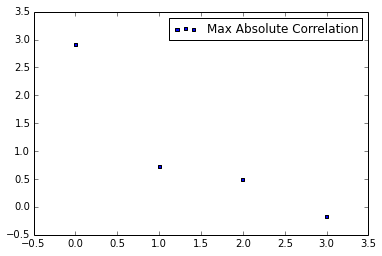

In [22]:
print lars_obj.max_corr_vs_iter
lars_obj.make_plots()

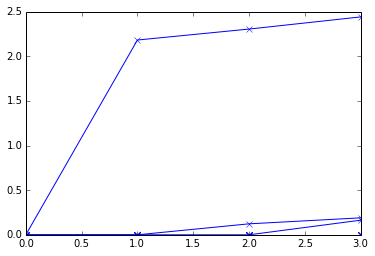

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(lars_obj.m):
      ax.plot(range(4),lars_obj.coefs_vs_iter[i][:4],'xb-',label="Coefficient "+str(i))
plt.show()

In [24]:
#lasso
lasso_obj = LARS(wX,wy,1)
lasso_obj.train()

we seem to be unable to progress though we have not included all parameters
printing indices used throughout iterations
[[], [0, 6], [0, 6, 1], [0, 6, 1, 13]]


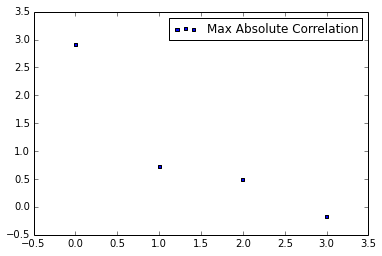

In [25]:
lasso_obj.make_plots()

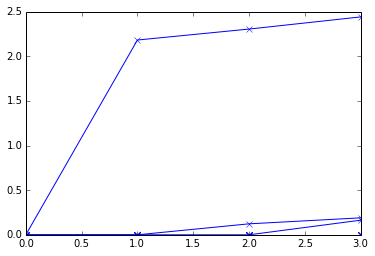

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(lasso_obj.m):
      ax.plot(range(4),lasso_obj.coefs_vs_iter[i][:4],'xb-',label="Coefficient "+str(i))
plt.show()